<h1>Text Analysis Clustering</h1>

This is an analysis of text data from a series of tweets involving the word "Kraft". I will be doing exploratory data analysis as well as clustering to present the categorization and relevance of key words in each of the tweets to see what was most discussed in this dataset of tweets. 

In this data, the data in which "Kraft" was mentioned was tied mostly to the following. It is not representative of all the tweets in the dataset but were the most prominent.<br>
- Robert Kraft, New England Patriots CEO and President
- Kraft Foods, a food company that has made products such as Kraft Macaroni & Cheese, Miracle Whip, and Kraft Singles, among others; now a part of Kraft Heinz Company




<h1>Introduction</h1>

Data is from Kaggle: https://www.kaggle.com/datasets/ranand60/unstructured-text-language-data/data

<br>

Since the data came from a Microsoft Excel File (.xlsx), install the following libraries in this notebook: openpyxl, xlrd.

The other libraries to be imported: Pandas, NumPy, Matplotlib, Scikit-learn

In [1]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
text_frame = pd.read_excel('Unstructured Data English.xlsx')

In [5]:
text_frame.head()

,ID,Katakana text Translated,Unnamed: 2
0,1,Huge @Patriots pep rally at Toso's in PHX...wa...,NaN
1,2,For Robert Kraft and Roger Goodell air still i...,NaN
2,3,For Robert Kraft and Roger Goodell air still i...,NaN
3,4,Need #recipes? Visit the Kraft #CookingUpGood ...,NaN
4,5,@EdgeofSports You take the good-You take the b...,NaN


In [6]:
# Get the name of the columns
text_frame.columns

Index(['ID', 'Katakana text Translated', 'Unnamed: 2'], dtype='object')

In [7]:
'''Get basic info on the dataframes
Only will be using one column: Katakana text Translated which contains all necessary data for analysis
'''

text_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        6936 non-null   int64 
 1   Katakana text Translated  6936 non-null   object
 2   Unnamed: 2                1 non-null      object
dtypes: int64(1), object(2)
memory usage: 162.7+ KB


In [8]:
# Rename column in text_frame titled 'Katakana text Translated' to 'Tweet' 
# Update column in text_frame titled 'Unnamed: 2' to 'Unnamed'

text_frame = text_frame.rename(columns={"ID":"ID", "Katakana text Translated": "Tweet", 'Unnamed: 2':"Unnamed"})
text_frame

,ID,Tweet,Unnamed
0,1,Huge @Patriots pep rally at Toso's in PHX...wa...,NaN
1,2,For Robert Kraft and Roger Goodell air still i...,NaN
2,3,For Robert Kraft and Roger Goodell air still i...,NaN
3,4,Need #recipes? Visit the Kraft #CookingUpGood ...,NaN
4,5,@EdgeofSports You take the good-You take the b...,NaN
...,...,...,...
6931,6932,"CHEESE IN MY POCKETS VELVEETA""",NaN
6932,6933,But why somebody just posted a pic on my fb fe...,NaN
6933,6934,Cheese in my pockets .. Velveeta,NaN
6934,6935,Cheese in my pocket Velveeta !,NaN


In [9]:
text_frame.describe()

,ID
count,6936.000000
mean,3468.500000
std,2002.395066
min,1.000000
25%,1734.750000
50%,3468.500000
75%,5202.250000
max,6936.000000


In [10]:
text_frame.nunique()

ID         6936
Tweet      6770
Unnamed       1
dtype: int64

In [11]:
# Check for unique values; almost all should be unique with exception for retweets
text_frame['Tweet'].unique()

array(["Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo",
       "For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport",
       "For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport",
       ...,
       '@grantlandis will you make me some Velveeta Mac and cheese with chicken?',
       'But why somebody just posted a pic on my fb feed of velveeta shells & cheese uncle Ben\'s brown rice or ricearoni & some frozen broccoli"',
       'Get a #Save $1 off #Kraft Natural #Cheese Products! #coupon http://pinterest.com/pin/446911962998255057/\xa0…'],
      dtype=object)

In [12]:
text_frame[text_frame['Tweet'].str.contains('sports')]

,ID,Tweet,Unnamed
13,14,check this out For Robert Kraft and Roger Good...,NaN
470,471,#sports Kraft on speech: I didn't like being u...,NaN
1673,1674,Roger Goodell on deflategate investigation Kra...,NaN
1866,1867,check this out Myers: Goodell won't Kraft apol...,NaN
1943,1944,Myers: Goodell won't Kraft apology for Deflate...,NaN
1953,1954,Belichick Carroll both say they owe a bundle t...,NaN
2362,2363,she had on athletic booster club shirt on too ...,NaN
2384,2385,More on Robert Kraft's absence from Roger Good...,NaN
2552,2553,RT @PCreighton1: Its #PCandADB 6-11p @sportsra...,NaN
2554,2555,Its #PCandADB 6-11p @sportsradio610 @ADBsports...,NaN


In [13]:
text_frame[text_frame['Tweet'].str.contains('Patriots')]

,ID,Tweet,Unnamed
0,1,Huge @Patriots pep rally at Toso's in PHX...wa...,NaN
39,40,Remember that time Putin may have stolen Patri...,NaN
54,55,The 73-Year-Old Patriots Owner Bob Kraft Has a...,NaN
62,63,RT @Life_and_Style: The #Patriots owner #BobKr...,NaN
74,75,Kraft on speech: I didn't like being unfairly ...,NaN
...,...,...,...
6635,6636,Does Robert Kraft own Kraft cheese?? That maca...,NaN
6662,6663,@alexmarvez @Patriots @NFLonFOX Want a second ...,NaN
6723,6724,Robert Kraft demands an apology whenever someo...,NaN
6740,6741,@robertsnell7 @GMA @ChrisEvans @CaptainAmerica...,NaN


In [14]:
text_frame[text_frame['Tweet'].str.contains('Velveeta')]

,ID,Tweet,Unnamed
407,408,$5.00 Off Kraft Macaroni and Cheese or Velveet...,NaN
2507,2508,@Scannon146 Kraft is good too. I've had better...,NaN
3263,3264,Velveeta over Kraft any day.,NaN
3287,3288,#SuperBowl #snack shopping? Hope there's no re...,NaN
5146,5147,Walgreens: FREE Kraft Homestyle Mac &amp; Chee...,NaN
...,...,...,...
6926,6927,@bennyc50 Was it the powdered cheese mac or th...,NaN
6928,6929,Velveeta cheese is a fucking experience,NaN
6930,6931,@grantlandis will you make me some Velveeta Ma...,NaN
6933,6934,Cheese in my pockets .. Velveeta,NaN


In [15]:
text_frame[text_frame['Tweet'].str.contains('mac and cheese')]

,ID,Tweet,Unnamed
138,139,Really craving mac and cheese!!! #Kraft,NaN
692,693,Never leave out the butter when making Kraft m...,NaN
1512,1513,I need kraft mac and cheese right fucking now,NaN
1816,1817,RT @samm_chino: Kraft mac and cheese gossip gi...,NaN
1932,1933,Our kids seem to prefer Kraft mac and cheese o...,NaN
2016,2017,@AndieSawyerRP @melissacoatesrp then eat up. I...,NaN
2223,2224,@AndieSawyerRP @JohnFlynnRP @melissacoatesrp *...,NaN
2264,2265,crying bc i want kraft mac and cheese but i do...,NaN
2433,2434,Kraft mac and cheese gossip girl and my best f...,NaN
2563,2564,I don't care how unhealthy it is- I will eat K...,NaN


In [16]:
# Check for retweets
text_frame[text_frame['Tweet'].str.contains('RT')]

,ID,Tweet,Unnamed
5,6,RT @HomespunSociety: Wrap it up http://t.co/82...,NaN
8,9,RT @OTLonESPN: Tomorrow 8am ET ESPN2: Fallout ...,NaN
10,11,RT @kittyFitz50: I love Kraft beer .@America_O...,NaN
18,19,Super COOL Mommy PAPER! http://t.co/6LFNV4JTOP...,NaN
19,20,RT @ProjetoIdols: RT to be a in a group DM wit...,NaN
...,...,...,...
6262,6263,VELVEETA SHELLS & CHEESE ARE THE WAY TO MY HEART,NaN
6354,6355,"RT @DanielleAlberti: ""How do you say 'American...",NaN
6447,6448,U mean they like kraft cheese RT @Rich729_: “@...,NaN
6729,6730,No dude Velveeta! RT @EricStangel: Not sure if...,NaN


In [17]:
text_frame[text_frame['Tweet'].str.contains('basketball')]

,ID,Tweet,Unnamed
605,606,If you can't watch KU basketball with me then ...,NaN
906,907,RT @HPbasketball: OK Geez. RT @DropStepHoops: ...,NaN
5306,5307,@Robert15Jgod Who's winning in basketball?,NaN
5314,5315,@AlexConstancio Are you playing basketball ?,NaN


In [18]:
text_frame[text_frame['Tweet'].str.contains('cheese')]

,ID,Tweet,Unnamed
28,29,Watch Kraft Dinner DESTROY American mac 'n che...,NaN
47,48,“@OrganicMami: “@Sanyalala: Not that fake crus...,NaN
48,49,“@Sanyalala: Not that fake crusty KRAFT cheese...,NaN
49,50,Not that fake crusty KRAFT cheese,NaN
72,73,If a girl tried feeding me Kraft Mac and chees...,NaN
...,...,...,...
6926,6927,@bennyc50 Was it the powdered cheese mac or th...,NaN
6928,6929,Velveeta cheese is a fucking experience,NaN
6929,6930,Can we have a velveeta Mac and cheese date? @g...,NaN
6930,6931,@grantlandis will you make me some Velveeta Ma...,NaN


In [19]:
text_frame[text_frame['Tweet'].str.contains('Kraft')]

,ID,Tweet,Unnamed
0,1,Huge @Patriots pep rally at Toso's in PHX...wa...,NaN
1,2,For Robert Kraft and Roger Goodell air still i...,NaN
2,3,For Robert Kraft and Roger Goodell air still i...,NaN
3,4,Need #recipes? Visit the Kraft #CookingUpGood ...,NaN
4,5,@EdgeofSports You take the good-You take the b...,NaN
...,...,...,...
6890,6891,@_KarinaD @denzildsouzaa @michelle_r16 @UncleO...,NaN
6894,6895,Kraft mac n cheese is shit rather have Velveeta,NaN
6900,6901,FREE Kraft Cheese + Money Maker Savings Catche...,NaN
6907,6908,I need Kraft cheese !!!,NaN


In [20]:
# Check the dataframe to see if there are any null values
# Do a count - there should be none (0)
text_frame.isnull().sum()

ID            0
Tweet         0
Unnamed    6935
dtype: int64

In [21]:
# Drop the 'Unnamed' column
text_frame = text_frame.drop(columns=['Unnamed'])
text_frame.head(3)

,ID,Tweet
0,1,Huge @Patriots pep rally at Toso's in PHX...wa...
1,2,For Robert Kraft and Roger Goodell air still i...
2,3,For Robert Kraft and Roger Goodell air still i...


In [22]:
# Current dataframe should only have two columns: ID, Tweet
text_frame.columns

Index(['ID', 'Tweet'], dtype='object')

In the case of this analysis, we must use scikit-learn to vectorize words since there is text that we will be scanning through and tokenizing. 

First, transform the data and fit into principal component analysis (PCA) model.<br>
The data to be fit is the column in <b>text_frame</b> named <b>Tweet</b>.<br>
Create clusters using k-means algorithms and principal components analysis. <br>



In [23]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# arr_text = np.array(text_frame['Katakana text Translated'])
# arr_text = text_frame['Katakana text Translated']
arr_text = text_frame.Tweet
arr_text

0       Huge @Patriots pep rally at Toso's in PHX...wa...
1       For Robert Kraft and Roger Goodell air still i...
2       For Robert Kraft and Roger Goodell air still i...
3       Need #recipes? Visit the Kraft #CookingUpGood ...
4       @EdgeofSports You take the good-You take the b...
                              ...                        
6931                       CHEESE IN MY POCKETS VELVEETA"
6932    But why somebody just posted a pic on my fb fe...
6933                     Cheese in my pockets .. Velveeta
6934                       Cheese in my pocket Velveeta !
6935    Get a #Save $1 off #Kraft Natural #Cheese Prod...
Name: Tweet, Length: 6936, dtype: object

In [25]:
type(arr_text[0])

str

Credit must be given for verifying and formatting the fitting of models and the use of the TfidfVectorizer package of the
Scikit-Learn Python library as seen in the examples provided by GeeksforGeeks. 
Without such insights, it may not have been possible to be able to search through a spreadsheet of text to find clusters as well as 
do Principal Component Analysis (PCA) on the text data. 


Article: "Clustering Text Documents using K-Means in Scikit-Learn", last updated 2023-06-09
Article URL: https://www.geeksforgeeks.org/clustering-text-documents-using-k-means-in-scikit-learn/


In [26]:
# In this case, will set the cluster count to be 2 for Robert Kraft and Kraft Foods
# for how the tweets are distributed. 
count_clusters = 2

vector = TfidfVectorizer(stop_words='english')

tweets_vector = vector.fit_transform(arr_text)

pca_model = PCA(n_components=count_clusters)
model_res = pca_model.fit_transform(tweets_vector.toarray())

kmeans = KMeans(n_clusters=count_clusters, n_init=5, max_iter=100, random_state=42)
kmeans.fit(tweets_vector)



KMeans(max_iter=100, n_clusters=2, n_init=5, random_state=42)

In [27]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
# After the model, the values in kmeans.labels_ should be 0, 1
print(kmeans.labels_.max(), kmeans.labels_.min())

1 0


In [29]:
# Get the names of the columns
text_frame.columns

Index(['ID', 'Tweet'], dtype='object')

In [30]:
# Make cluster labels for this model
# two_cluster_labels = kmeans.predict(arr_text)
# two_cluster_center = kmeans.cluster_centers_
# two_cluster_center
# 
# kmeans_two_df = pd.DataFrame(two_cluster_labels)
# arr_text.insert((kmeans_two_df.shape[2]), 'clusters', kmeans_two_df)



In [31]:
'''Prepare the number of clusters for Kraft-related tweets

Create a dataframe with all the clustered results'''
clusters_df = pd.DataFrame()
clusters_df['tweet'] = arr_text 
clusters_df['cluster_number'] = kmeans.labels_
clusters_df.head()

,tweet,cluster_number
0,Huge @Patriots pep rally at Toso's in PHX...wa...,1
1,For Robert Kraft and Roger Goodell air still i...,1
2,For Robert Kraft and Roger Goodell air still i...,1
3,Need #recipes? Visit the Kraft #CookingUpGood ...,0
4,@EdgeofSports You take the good-You take the b...,1


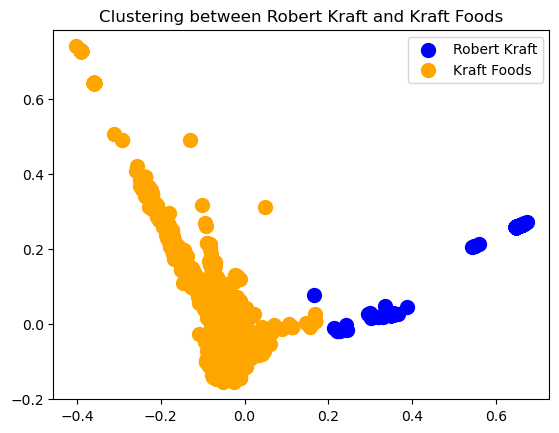

In [32]:
# Visualize results of tweets and findings between Robert Kraft and Kraft Foods

colors = ['blue', 'orange']
categories = ['Robert Kraft', 'Kraft Foods']
for i in range(count_clusters):
    plt.scatter(model_res[kmeans.labels_ == i, 0], 
                model_res[kmeans.labels_ == i, 1], s=100, color=colors[i])
plt.legend(categories)
plt.title("Clustering between Robert Kraft and Kraft Foods")
plt.show()


Now, I will try a text clustering model where there are three (3) clusters of text, the new cluster being listed as <b>other</b>. 
This will also use the TfidfVectorizer package of the Scikit-Learn library. 


In [33]:
count_clusters = 3

vector = TfidfVectorizer(stop_words='english')

tweets_vector = vector.fit_transform(arr_text)

pca_model = PCA(n_components=count_clusters)
model_res = pca_model.fit_transform(tweets_vector.toarray())

kmeans = KMeans(n_clusters=count_clusters, n_init=5, max_iter=100, random_state=42)
kmeans.fit(tweets_vector)


KMeans(max_iter=100, n_clusters=3, n_init=5, random_state=42)

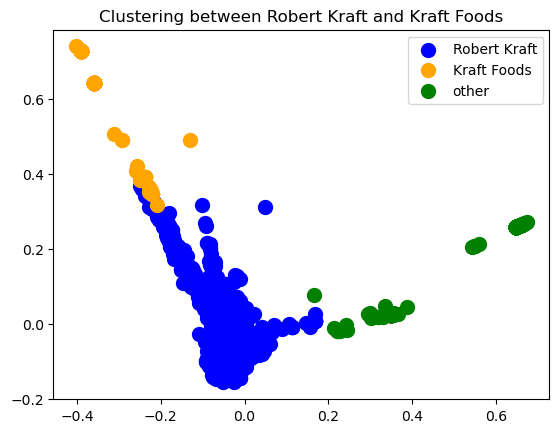

In [34]:
colors = ['blue', 'orange', 'green']
categories = ['Robert Kraft', 'Kraft Foods', 'other']
for i in range(count_clusters):
    plt.scatter(model_res[kmeans.labels_ == i, 0], 
                model_res[kmeans.labels_ == i, 1], s=100, color=colors[i])
plt.legend(categories)
plt.title("Clustering between Robert Kraft and Kraft Foods")
plt.show()

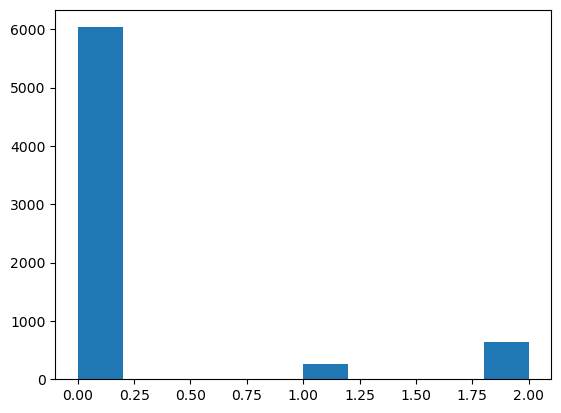

In [35]:
# Make a histogram of the words in the tweets that appear the most often. 

plt.hist(kmeans.labels_)
plt.show()


In [36]:
# The algorithm type being used for this version of KMeans with 3 clusters is "Lloyd"
kmeans.algorithm

'lloyd'

In [37]:
# Try to now use Elkan, the other kind of algorithm
count_clusters = 3

vector = TfidfVectorizer(stop_words='english')

tweets_vector = vector.fit_transform(arr_text)

pca_model = PCA(n_components=count_clusters, random_state=24)
model_res = pca_model.fit_transform(tweets_vector.toarray())

kmeans = KMeans(n_clusters=count_clusters, n_init=10, max_iter=100, random_state=42, algorithm='elkan')
kmeans.fit(tweets_vector)

KMeans(algorithm='elkan', max_iter=100, n_clusters=3, n_init=10,
       random_state=42)

C:\Users\mjchin\Anaconda3\envs\matt_py310\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


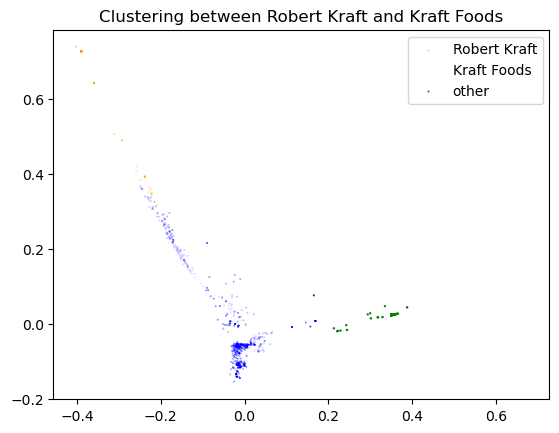

In [38]:
# Visualize results using Elkan algorithm
colors = ['blue', 'orange', 'green']
categories = ['Robert Kraft', 'Kraft Foods', 'other']
for i in range(count_clusters):
    plt.scatter(model_res[kmeans.labels_ == i, 0], 
                model_res[kmeans.labels_ == i, 1], 
                model_res[kmeans.labels_ == i, 2], color=colors[i])
plt.legend(categories)
plt.title("Clustering between Robert Kraft and Kraft Foods")
plt.show()

In [39]:
kmeans.algorithm

'elkan'

In [40]:
# Mean of the training set
pca_model.mean_

array([7.23253218e-04, 4.50593170e-04, 5.24726750e-04, ...,
       6.06340382e-05, 1.30458294e-04, 6.85895290e-05])

In [84]:
pca_model.n_features_

13481

In [100]:
kmeans.labels_.shape

(6936,)

In [112]:
pca_model.singular_values_

array([15.67716992, 13.81147809, 11.79622621])

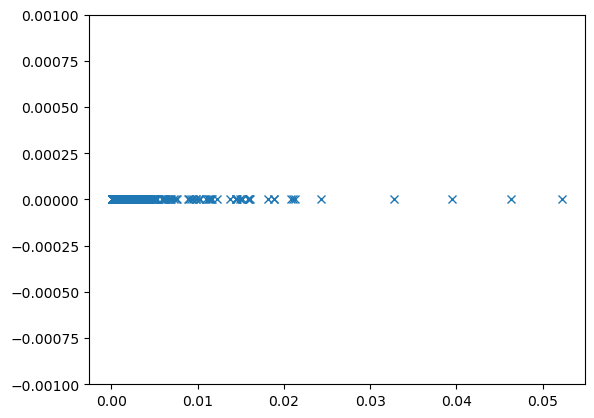

In [146]:
# plt.plot(pca_model.mean_, [0] * pca_model.mean_.shape[0], 'x', **kwargs)

plt.plot(pca_model.mean_, np.zeros_like(pca_model.mean_) + 0., 'x')
plt.ylim([-0.001, 0.001])
plt.show()

In [41]:
# Get the explained variance ratio of the PCA model with the data used
pca_model.explained_variance_ratio_

array([0.03606748, 0.02799373, 0.02042052])

In [57]:
pca_model.explained_variance_

array([0.0354396 , 0.02750641, 0.02006503])

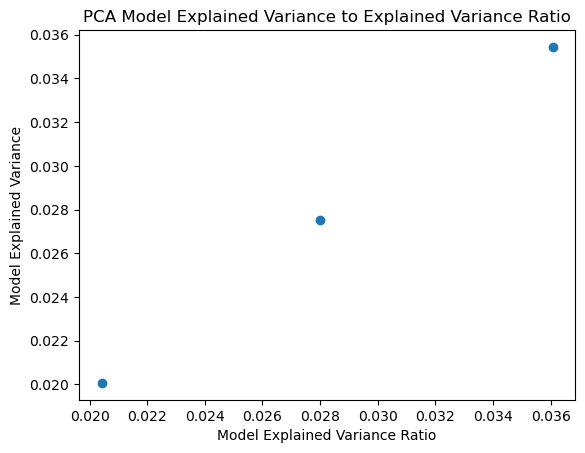

In [113]:
plt.scatter(pca_model.explained_variance_ratio_, pca_model.explained_variance_)
plt.title("PCA Model Explained Variance to Explained Variance Ratio")
plt.xlabel("Model Explained Variance Ratio")
plt.ylabel("Model Explained Variance")
plt.show()

In [42]:
kmeans.inertia_

6422.700043098024

In [43]:
pca_model.n_features_in_

13481

In [118]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 0])

In [147]:
kmeans.verbose

0

In [152]:
model_res.shape

(6936, 3)

In [157]:
model_res


array([[-0.02646549, -0.06445492, -0.01559326],
       [-0.02924226, -0.09721412, -0.02585357],
       [-0.02924226, -0.09721412, -0.02585357],
       ...,
       [-0.39003903,  0.72776517,  0.07123537],
       [-0.35921241,  0.64341851,  0.05684802],
       [-0.05347809,  0.00770589, -0.00789759]])

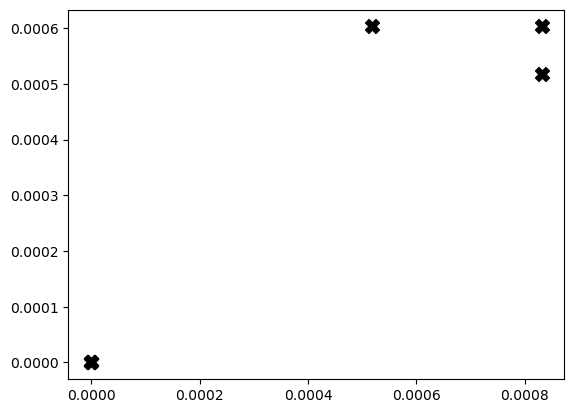

In [183]:
# Plots of the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=100, c='black', marker='X')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
            s=100, c='black', marker='X')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], 
            s=100, c='black', marker='X')
plt.show()

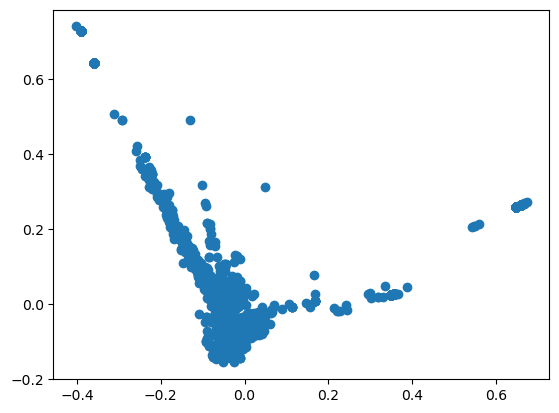

In [184]:
plt.scatter(model_res[:, 0], model_res[:, 1])
plt.show()